/Users/epillon/Library/Python/3.9/lib/python/site-packages/fastf1/core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
/Users/epillon/Library/Python/3.9/lib/python/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/Users/epillon/Library/Python/3.9

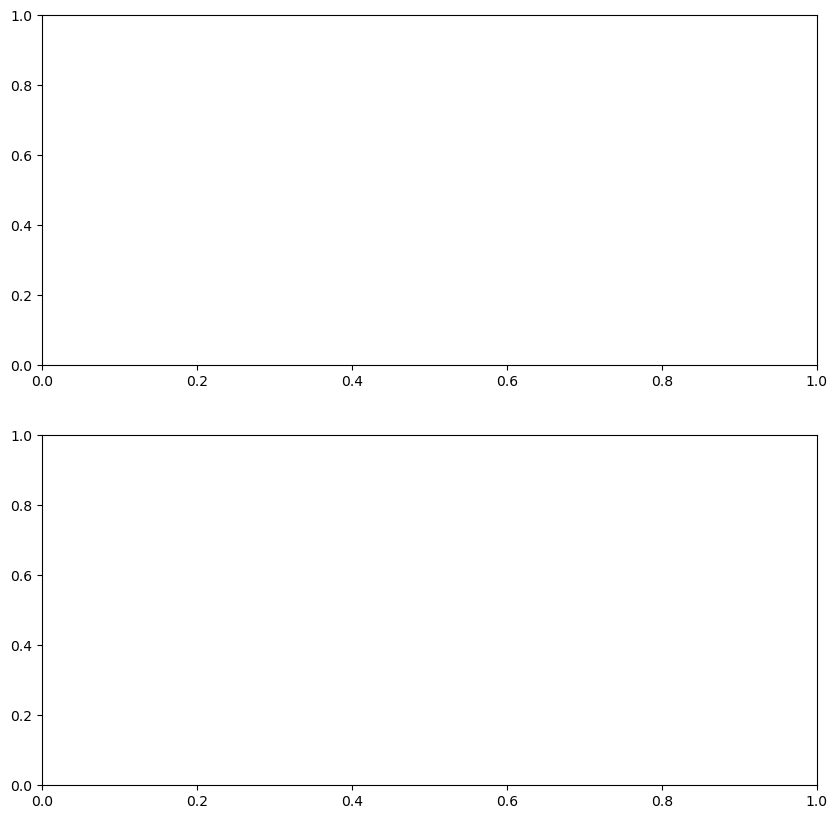

In [27]:
import fastf1 as ff1
from fastf1 import plotting

import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm

import numpy as np

import os
import sys

# Enable the cache
#ff1.Cache.enable_cache('cache/') 

# Get rid of an error
pd.options.mode.chained_assignment = None

year, grand_prix, session = int(2023), 'azerbaijan', 'R'

circuit = grand_prix.replace(" ", "_")
foldername = f"assets/img/{year}/{circuit}/"

if not os.path.exists(foldername):
    os.makedirs(foldername)

# Load the session data
race = ff1.get_session(year, circuit, session)

# Get the laps
laps = race.load_laps()

# Convert laptimes to seconds
laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()

# To get accurate laps only, we exclude in- and outlaps
laps = laps.loc[(laps['PitOutTime'].isnull() & laps['PitInTime'].isnull())]

# Also, we remove outliers since those don't represent the racepace,
# using the Inter-Quartile Range (IQR) proximity rule
q75, q25 = laps['LapTimeSeconds'].quantile(0.75), laps['LapTimeSeconds'].quantile(0.25)

intr_qr = q75 - q25

laptime_max = q75 + (1.5 * intr_qr) # IQR proximity rule: Max = q75 + 1,5 * IQR
laptime_min = q25 - (1.5 * intr_qr) # IQR proximity rule: Min = q25 + 1,5 * IQR

laps.loc[laps['LapTimeSeconds'] < laptime_min, 'LapTimeSeconds'] = np.nan
laps.loc[laps['LapTimeSeconds'] > laptime_max, 'LapTimeSeconds'] = np.nan

# drivers_to_visualize = [i for i in sys.argv[3:]]
drivers_to_visualize = ['LEC', 'PER', 'VER', 'ALO', 'HAM']

# To make sure we won't get any equally styled lines when comparing teammates
visualized_teams = []

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [10, 10]

# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots(2)


In [28]:
laptimes = [laps.pick_driver(x)['LapTimeSeconds'].dropna() for x in drivers_to_visualize] 

# ax[0].boxplot(laptimes, labels=drivers_to_visualize)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

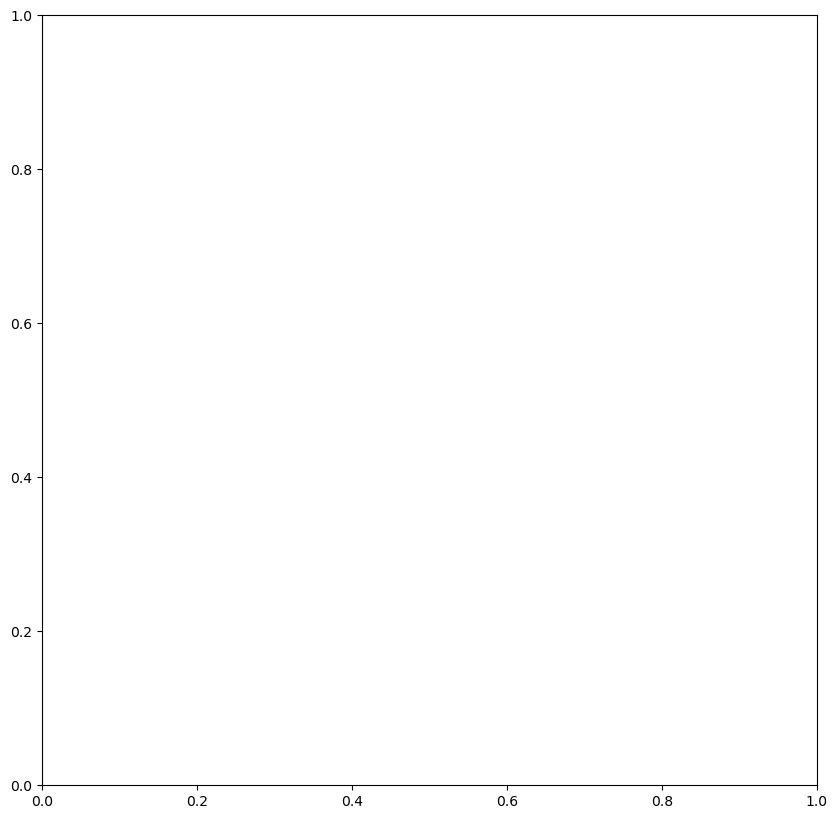

In [29]:
plt.boxplot(laptimes)

In [30]:
len(laptimes[0])

47

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

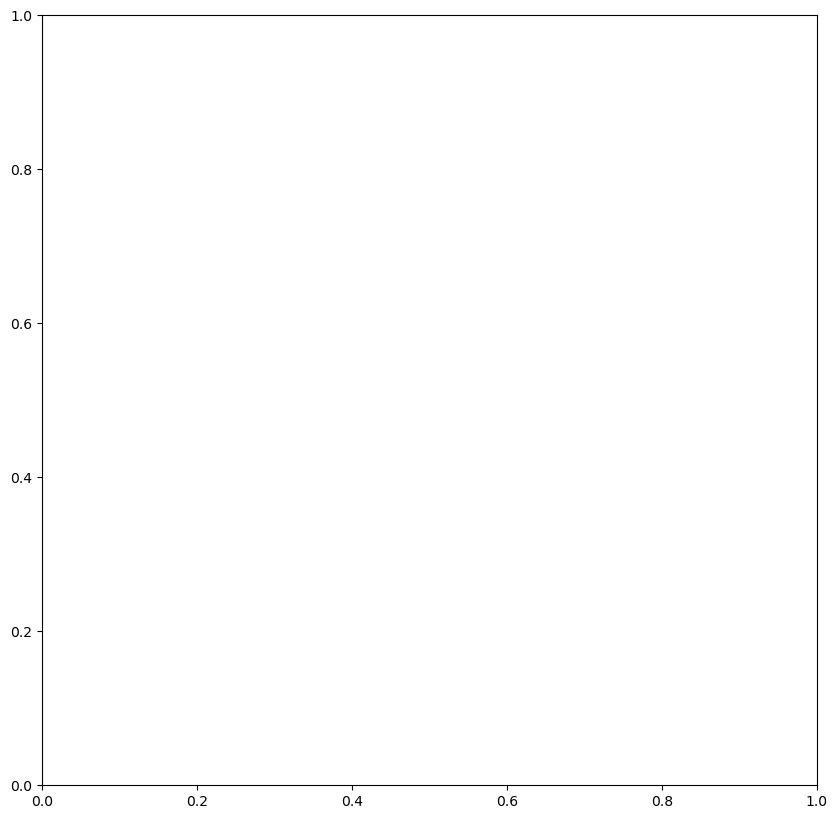

In [31]:
plt.boxplot(laptimes)

In [32]:
for i in laptimes:
    print(len(i))

47
47
46
47
45


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

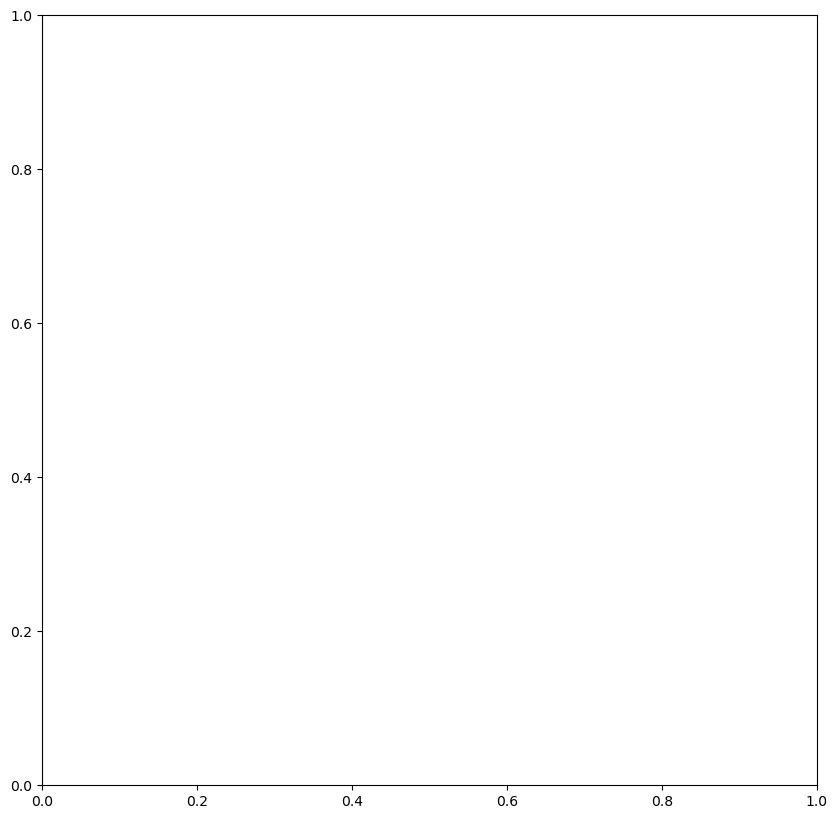

In [35]:
new_laptimes = [laptimes[1], laptimes[0], laptimes[3], laptimes[2]]
plt.boxplot(new_laptimes)